# Memoria Trabajo Redes Neuronales CI
### Jonay Suárez Ramírez 
#### 22/01/2022

## Introducción
En esta memoria se reflejan los áspectos más importantes del trabajo sobre Redes Neuronales realizado para la asignatura de Computación Inteligente. Estos áspectos son el problema que se intenta resolver, el modelos y los datasets utilizados y el trabajo llevado a cabo para cumplir los objetivos.

## Problema
El problema que se intenta resolver es el de detectar una amplia variedad de objetos de forma específica en entornos marítimos y costeros. Algunos de estos objetos pueden encontrarse flotando en el agua.

El mayor inconveniente es que no hay ningún dataset disponible para este problema en concreto. La mayor parte de las clases de interés (persona, perro, tabla de surf, etc) está presente en el dataset COCO, que es un dataset muy grande, con más de 117 mil imagénes y por lo tanto también es muy costoso de entrenar con el. Por suerte, practicamente todos los modelos de detección para compararlos entre si se entrenan para COCO. Por otro lado, algunas de las clases como _kayak_ o _velero_ no están por lo que utilizamos un segundo dataset, Aerial Floating Objects (AFO) disponible publicamente en Kaggle (https://www.kaggle.com/jangsienicajzkowy/afo-aerial-dataset-of-floating-objects). En este trabajo intentamos combinar la información de ambos datasets.

En la literatura, lo que se considera que es la mejor solución para aprender de ambos datasets y poder tener todas las clases de interés en un único modelo sería entrenar desde cero una red neuronal con los ambos datasets juntos. Esta solución es tremendamente costosa, puesto que entrenar solo COCO toma más de 40 dias de GPU y resulta prohibitivo para este trabajo.

La técnica más habitual es el _Transfer Learning_ [1] y más concretamente el _Finetuning_ donde se toma una red neuronal pre-entrenada en un gran dataset y después se re-entrena con el dataset objetivo. En este caso esta técnica tampoco es una opción porque las redes neuronales sufren un fenómeno llamado _Catastrophic Forgetting_ [2], que significa que cuando un modelo se ha entrenado para una tarea $T_1$, y después se re-entrena para una segunda tarea $T_2$ donde no coinciden las clases o no coinciden parcialmente, el rendimiento del modelo para la tarea $T_1$ cae drásticamente. Algunas técnicas como el _Learning without Forgetting_ [3] se han planteado para solventar esto en tareas de clasificación y es un tema de investigación activo sobre todo por la cuestión de fondo, el dilema de Plasticidad-Estabilidad. El dilema lo que plantea es tener la estabilidad para mantener conocimientos previos y en ocasiones bastante antiguos y la plasticidad para adquirir conocimientos nuevos como hacemos los humanos. Pocos trabajos de investigación han tratado este tema para la detección más allá de adaptar el problema de detección a un problema de clasificación de cajas precalculadas.

## Datasets

### COCO
El dataset MS-COCO (Microsoft Common Objects in Context) es dataset de gran tamaño para detección de objetos, segmentación, detección de puntos clave y _captioning_ (dar una explicación textual de una escena).

En 2017 la división de entrenamiento/validación está compuesto por 118 mil/5 mil imágenes y 91 clases de las que 80 están presentes en las imágenes. 

### AFO
El dataset AFO es el primer dataset libre para entrenar modelos de _machine learning/deep learning_ para aplicaciones de busca y rescate marítimo. Contiene imágenes de aéreas desde drones con 40000 anotaciones a manos de personas y objetos flotantes en el agua, muchas de ellas de pequeño tamaño. Contiene un total de 3647 imágenes, 39991 objetos pertenecientes a 6 clases (humano, tabla de surf/padel surf, barco, boya, velero y kayak) y sus anotaciones se encuentran en formato YOLO.

## Modelo
...

## Trabajo realizado

### Elección del modelo
Para elegir el modelo con el que trabajar se probaron diversos modelos del estado del arte como YoloV4, varias variantes de YOLOR y DETR entre otros. Se escogió DETR por tener una calidad de detección similar y una mayor confianza en las detecciones.
<table>
    <tr>
        <td> <img src="figures/yolor_d6.jpeg" alt="yolor_d6 inference" /> </td>
        <td> <img src="figures/yolov4.jpg" alt="yolov4 inference"/> </td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 11pt"> YOLOR D6 </td>
        <td style="text-align: center; font-size: 11pt"> YOLO V4 </td>
    </tr>
    <tr>
        <td> <img src="figures/yolor_w6.jpeg" alt="yolor_w6 inference" /> </td>
        <td> <img src="figures/detr.png" alt="detr inference"/> </td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 11pt"> YOLOR W6 </td>
        <td style="text-align: center; font-size: 11pt"> DETR R101 </td>
    </tr>
</table>

### Preparación del dataset

#### Conversión de AFO a formato COCO
El dataset de AFO tiene las etiquetas en formato AFO por lo que el primer paso fue convertirlo al formato COCO porque es para que estaba preparado el código de entrenamiento de DETR suministrado por los autores. Esto lo realicé basandome en el repositorio https://github.com/Taeyoung96/Yolo-to-COCO-format-converter.

#### Data augmentation de situaciones climáticas a AFO
Usando el paquete _imgaug_ (https://github.com/aleju/imgaug) se aplicaron 4 filtros de situaciones climáticas (nubes, neblina, calima y lluvia) y un filtro de multiplicación de los canales RGB de forma aleatoria a las imágenes.

<table>
    <tr>
        <td> <img src="figures/a_116.jpg" alt="Imagen original" /> </td>
        <td> <img src="figures/a_116_clouds.jpg" alt="Cloud augmentation"/> </td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 11pt"> Original </td>
        <td style="text-align: center; font-size: 11pt"> Filtro de nubes </td>
    </tr>
    <tr>
        <td> <img src="figures/a_116_fog.jpg" alt="Fog augmentation" /> </td>
        <td> <img src="figures/a_116_haze.jpg" alt="Haze augmentation"/> </td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 11pt"> Filtro neblina </td>
        <td style="text-align: center; font-size: 11pt"> Filtro calima </td>
    </tr>
    <tr>
        <td> <img src="figures/a_116_rain.jpg" alt="Rain augmentation" /> </td>
        <td> <img src="figures/a_116_multiply.jpg" alt="Multiply augmentation"/> </td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 11pt"> Filtro lluvia </td>
        <td style="text-align: center; font-size: 11pt"> Filtro multiplicación canales </td>
    </tr>
</table>

#### Filtrar subconjunto de COCO
Se filtró de las 117 mil imágenes de COCO aquellas que tenían los objetos de las clases de interés de nuestro problema quedando 69 mil imágenes de COCO.

#### Estructura del dataset
Partiendo de la estructura de COCO:<br>
├ annotations/ <br>
│ ├ annotations/custom_train.json <br>
│ └ annotations/custom_val.json <br>
├ train2017/ <br>
└ val2017/ <br>

Se modificó para usar la estructura con 2 datasets validación uno para AFO y otro para parte de COCO <br>
├ annotations/ <br>
│ ├ annotations/custom_test.json <br>
│ ├ annotations/custom_train.json <br>
│ ├ annotations/custom_val.json <br>
│ └ annotations/minicoco_val.json <br>
├ train2017/ <br>
├ test2017/ <br>
├ val2017 <br>
└ cocoval2017/ <br>


Donde las 6 mil primeras imágenes de train2017 son las imágenes de AFO con las imágenes sintéticas, val2017 y test2017 tienen las imágenes de validación y test de AFO y cococal2017 tiene el subconjunto de validación de COCO con alguna clase de interés.

### Proceso de Entrenamiento

Basandome en la modificación que hace el usuario de GitHub _woctezuma_ en https://github.com/woctezuma/detr al repositorio original para poder usar cualquier dataset con el formato de COCO y no solo COCO como en https://github.com/facebookresearch/detr, adapté la estructura para que siga la anteriormente descrita y tenga 2 conjuntos de validación, uno para AFO y otro COCO.

El esquema de entrenamiento no es habitual. En la literatura de aprendizaje continuo se considera que guardar algunos ejemplos de etapas anteriores ayuda a mantener las habilidades adquiridas en entrenamientos anteriores, sobre todo si esos ejemplos se escogen de forma correcta. El planteamiento en este caso es partir de DETR pre-entrenado en COCO y entrenar con el nuevo dataset (AFO) y con parte de COCO. En lugar de escoger de forma estática una parte de COCO y entrenar siempre con esa (hay que recordar que ya se entrenó con todo el dataset 200 epochs) se toma todo el subconjunto de interés de coco y se parte en conjuntos de 5000 imágenes. En cada epoch se unen las 6000 imágenes de AFO con 5000 imágenes de COCO, 5000 distintas en cada epoch, en total en cada epoch se entrena con 11000 imágenes. De esta manera mantenemos los costes de entrenamiento bajos y evitamos sobreajuste con las imágenes de COCO puesto que aparte de las 200 veces que ya ha visto el modelo cada imágen de esta manera solo verá cada imagén entre 8 y 9 veces más durante este entrenamiento. Este entrenamiento se realizó durante 100 epochs. En el siguiente diagrama se ilustra este esquema.

![Diagrama del entrenamiento](figures/TrainingScheduleDiagram.png)

Para llevar a cabo este esquema implementé un Sampler de Pytorch que realiza las particiones, controla los ciclos y tiene en cuenta que las primeras 6000 imágenes deben ser parte del conjunto de entrenamiento en todas las epochs.

In [ ]:
from torch.utils.data import Sampler

class CustomStaticSampler(Sampler):
    def __init__(self, data_source, num_static_samples=0,num_samples=None):
        self.data_source = data_source
        self._num_static_samples = num_static_samples
        self._num_samples = num_samples

        if not isinstance(self._num_samples, int) or self._num_samples <= 0:
            raise ValueError(
                "num_samples should be a positive integer "
                "value, but got num_samples={}".format(self._num_samples)
            )

        if not isinstance(self._num_static_samples, int) or self._num_static_samples <= 0:
            raise ValueError(
                "num_samples should be a positive integer "
                "value, but got num_samples={}".format(self._num_static_samples)
            )

        self._changing_samples = len(data_source) - num_static_samples
        self._changing_samples_per_epoch = num_samples - num_static_samples
        self._batch_in_epoch = 0
        self._max_batch_in_epoch = self._changing_samples // self._changing_samples_per_epoch
        self._changing_state = None

    @property
    def num_samples(self):
        # dataset size might change at runtime
        if self._num_samples is None:
            return len(self.data_source)
        return self._num_samples

    def __iter__(self):
        self._batch_in_epoch = 0 if self._batch_in_epoch == self._max_batch_in_epoch else self._batch_in_epoch

        if self._batch_in_epoch == 0:
            self._changing_state = torch.randperm(self._changing_samples, dtype=torch.int64) + self._num_static_samples
        
        changing_start = self._batch_in_epoch * self._changing_samples_per_epoch
        changing_end = (self._batch_in_epoch + 1) * self._changing_samples_per_epoch
        changing_batch = self._changing_state[changing_start : changing_end]

        self._batch_in_epoch += 1

        static_batch = torch.arange(end=self._num_static_samples)

        epoch_batch = torch.cat((static_batch, changing_batch))[torch.randperm(self._num_samples)]
        return iter(epoch_batch.tolist())

    def __len__(self):
        return self.num_samples

### Resultados
Los resultados de las evaluaciones cada 5 epochs se agruparon en dos CSVs, _summaryAFO.csv_ para las evaluaciones en AFO y _summaryCOCO.csv_ para las evaluaciones en COCO.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_afo = pd.read_csv('summaryAFO.csv')
df_afo # resultados de las evaluacion en afo_val

,epoch,class_error,loss,loss_ce,loss_bbox,loss_giou,AP,AP50,AP75,APs,APm,APl
0,0,25.22,12.3450,0.7142,0.1736,1.1041,0.075,0.164,0.062,0.000,0.009,0.129
1,5,2.61,0.9896,0.1603,0.0953,0.7186,0.306,0.676,0.227,0.049,0.201,0.402
2,10,0.87,0.9651,0.1320,0.0960,0.7137,0.333,0.691,0.267,0.038,0.269,0.453
3,15,2.61,0.9738,0.1101,0.0941,0.7607,0.314,0.671,0.262,0.020,0.209,0.422
4,20,0.87,0.9219,0.1002,0.0900,0.7142,0.378,0.743,0.356,0.060,0.335,0.502
5,25,2.61,0.8778,0.1321,0.0864,0.6681,0.353,0.699,0.320,0.024,0.322,0.479
6,30,2.61,0.9079,0.1268,0.0892,0.7003,0.337,0.709,0.277,0.046,0.276,0.460
7,35,1.74,0.8667,0.0998,0.0813,0.6716,0.352,0.730,0.282,0.031,0.251,0.473
8,40,3.48,0.9568,0.1000,0.0905,0.7373,0.288,0.645,0.198,0.019,0.252,0.407
9,50,1.74,0.8836,0.1008,0.0840,0.6744,0.356,0.716,0.309,0.045,0.323,0.478


In [3]:
df_coco = pd.read_csv('summaryCOCO.csv')
df_coco # resultados de las evaluaciones en minicoco_val

,epoch,class_error,loss,loss_ce,loss_bbox,loss_giou,AP,AP50,AP75,APs,APm,APl
0,0,0.00,7.3999,0.3241,0.1673,0.5397,0.442,0.670,0.466,0.256,0.512,0.636
1,5,27.27,1.2464,0.3820,0.2350,0.6093,0.313,0.557,0.301,0.145,0.369,0.516
2,10,18.18,1.3121,0.3523,0.2559,0.6263,0.298,0.532,0.289,0.140,0.357,0.480
3,15,9.09,1.2664,0.3604,0.2270,0.6452,0.303,0.545,0.295,0.143,0.366,0.495
4,20,18.18,1.2626,0.3851,0.2278,0.6259,0.306,0.539,0.293,0.144,0.366,0.481
5,25,18.18,1.3267,0.4046,0.2323,0.6143,0.318,0.553,0.315,0.153,0.369,0.498
6,30,18.18,1.3958,0.4025,0.2206,0.6084,0.298,0.538,0.288,0.141,0.358,0.476
7,35,18.18,1.2629,0.3857,0.2362,0.6129,0.297,0.531,0.287,0.140,0.365,0.460
8,40,27.27,1.2763,0.3887,0.2471,0.6444,0.284,0.518,0.270,0.123,0.343,0.460
9,50,18.18,1.2167,0.4065,0.2303,0.5861,0.290,0.519,0.283,0.138,0.339,0.462


In [4]:
def combine_dfs(df1, df2, columns, suffix1='afo', suffix2='coco', join_col='epoch'):
    df_comb = df1[columns].copy(deep=True)
    df_comb.rename(columns = { col : col + '_'+ suffix1 for col in columns}, inplace = True)
    df_comb = pd.concat([df1[join_col], df_comb, df2[columns]], axis=1)
    df_comb.rename(columns = { col : col + '_'+ suffix2 for col in columns}, inplace = True)
    return df_comb

In [5]:
def plot_widedf(df, ycolumn, xcolumn='epoch'):
    sns.set_style('darkgrid')
    sns.set(rc={"figure.figsize": (10, 6)})
    sns.set_palette('Set2')

    sns.lineplot(data=pd.melt(df, [xcolumn]), x=xcolumn, y='value', hue='variable')

    plt.title(ycolumn + ' per epoch')
    plt.ylabel(ycolumn)
    plt.xticks([x for x in range(0,101,5)])


    plt.show()

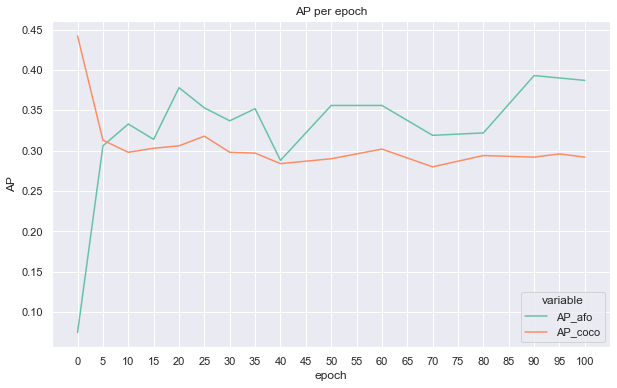

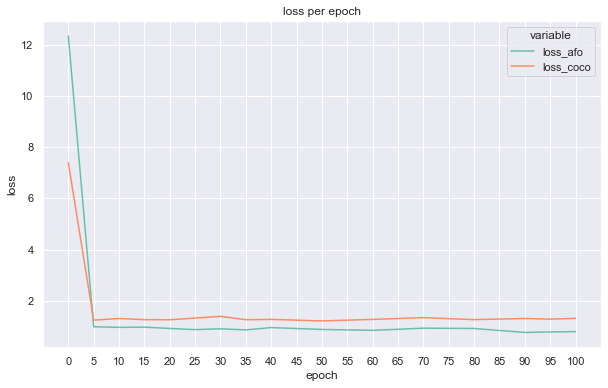

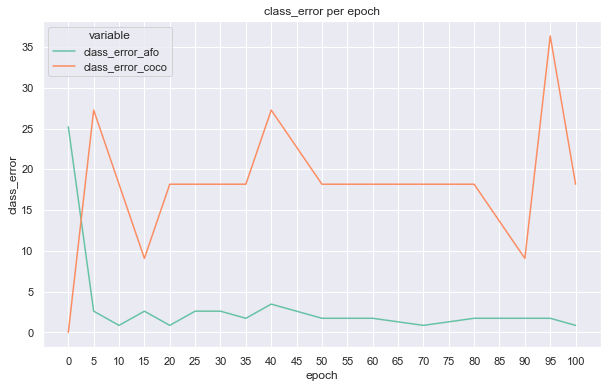

In [6]:
columns = ['AP', 'loss', 'class_error']
for col in columns:
    plot_widedf(combine_dfs(df_afo, df_coco, [col]), col)

## Referencias

[1] https://en.wikipedia.org/wiki/Transfer_learning <br>
[2] https://en.wikipedia.org/wiki/Catastrophic_interference <br>
[3] https://arxiv.org/abs/1606.09282v3 <br>